<a href="https://colab.research.google.com/github/arashkhgit/DataScience-cheat-sheet/blob/main/Snapp!_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)


# Data Cleaning and Preprocessing:



*   Handle missing data: Identify missing values and decide how to deal with them (e.g., impute, drop, or leave as-is).
*   Remove duplicate records, if any, to avoid skewing analysis results.
*   Address data inconsistencies, such as spelling errors, capitalization, or data entry mistakes.
*   Handle outliers if they exist and could influence the analysis.








### Step 1: Data Examination

In [52]:
# Check the basic information of the data
print("Step 1: Data Information")
print(data.info())

Step 1: Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375068 entries, 0 to 375067
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      375068 non-null  int64  
 1   create_time   375068 non-null  object 
 2   category      375068 non-null  object 
 3   city          375068 non-null  object 
 4   customer_id   375068 non-null  int64  
 5   price         375068 non-null  int64  
 6   distance      375068 non-null  float64
 7   status        375068 non-null  object 
 8   cancelled_by  164657 non-null  object 
 9   biker_id      255525 non-null  float64
 10  accept_time   375068 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.5+ MB
None


### Step 2: Missing Value Analysis

In [53]:
# Check for missing values in each column
print("\nStep 2: Missing Values")
missing_values = data.isnull().sum()
print(missing_values)


Step 2: Missing Values
order_id             0
create_time          0
category             0
city                 0
customer_id          0
price                0
distance             0
status               0
cancelled_by    210411
biker_id        119543
accept_time          0
dtype: int64


### Step 3: Data Cleaning

In [54]:
# Step 3.1: Convert date columns to proper datetime format
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Step 3.2: Convert 'price' and 'Distance' columns to numeric (if they contain numeric values)
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')

# Step 3.3: Handle missing values in 'biker_id'
# Since 'biker_id' is empty when the order is not accepted, let's fill it with a more appropriate value, such as 'NOT_ACCEPTED'
data['biker_id'].fillna('NOT_ACCEPTED', inplace=True)

# Step 3.4: Handle missing values in 'cancelled_by'
# Fill missing values in 'cancelled_by' with "UNKNOWN"
data['cancelled_by'].fillna("UNKNOWN", inplace=True)

### Step 4: Data Preprocessing

In [55]:
# Step 4.1: Convert text columns to lowercase
data['category'] = data['category'].str.lower()
data['city'] = data['city'].str.lower()
data['status'] = data['status'].str.lower()
data['cancelled_by'] = data['cancelled_by'].str.lower()

# Step 4.2: Remove duplicate rows, if any
data.drop_duplicates(inplace=True)

# Step 4.3: Convert 'order_id', 'customer_id', and 'biker_id' to integers
data['order_id'] = data['order_id'].astype(int)
data['customer_id'] = data['customer_id'].astype(int)

In [56]:
missing_values = data.isnull().sum()
print(missing_values)

order_id        0
create_time     0
category        0
city            0
customer_id     0
price           0
distance        0
status          0
cancelled_by    0
biker_id        0
accept_time     0
dtype: int64


### Step 4: Exploratory Data Analysis (EDA)

In [57]:
# Step 4.1: Summary Statistics
print("\nStep 4.1: Summary Statistics")
print(data.describe())

# Step 4.2: Category-wise Analysis
print("\nStep 4.2: Category-wise Analysis")
category_counts = data['category'].value_counts()
print(category_counts)

# Step 4.3: City-wise Analysis
print("\nStep 4.3: City-wise Analysis")
city_counts = data['city'].value_counts()
print(city_counts)

# Step 4.4: Status-wise Analysis
print("\nStep 4.4: Status-wise Analysis")
status_counts = data['status'].value_counts()
print(status_counts)

# Step 4.5: Cancellation Reasons Analysis
print("\nStep 4.5: Cancellation Reasons Analysis")
cancelled_by_counts = data['cancelled_by'].value_counts()
print(cancelled_by_counts)

# Step 4.6: Price and Distance Analysis
print("\nStep 4.6: Price and Distance Analysis")
print("Average Price:", data['price'].mean())
print("Maximum Price:", data['price'].max())
print("Minimum Price:", data['price'].min())
print("Average Distance:", data['distance'].mean())
print("Maximum Distance:", data['distance'].max())
print("Minimum Distance:", data['distance'].min())


Step 4.1: Summary Statistics
           order_id   customer_id         price       distance
count  3.750680e+05  3.750680e+05  3.750680e+05  375068.000000
mean   8.999800e+07  7.120808e+05  1.615349e+05       9.116743
std    5.778507e+06  2.005503e+06  1.772371e+05       8.932254
min    8.000106e+07  1.000000e+00  1.000000e+04      -0.000300
25%    8.498805e+07  1.000000e+00  6.000000e+04       3.461000
50%    8.999131e+07  1.000000e+00  1.000000e+05       6.844000
75%    9.501505e+07  2.000000e+00  1.900000e+05      12.045400
max    1.000009e+08  7.999915e+06  4.395000e+06     345.040000

Step 4.2: Category-wise Analysis
bwb     214233
pass     75097
vn       40675
bik      40175
car       2492
vn_h      2396
Name: category, dtype: int64

Step 4.3: City-wise Analysis
tehran     150241
isfahan     50428
mashhad     47250
shiraz      46049
qom         26496
ahvaz       21927
karaj       19430
tabriz       8798
kerman       2665
yazd         1781
tabas           3
Name: city, dtype: int

### Step 5: Data Visualization

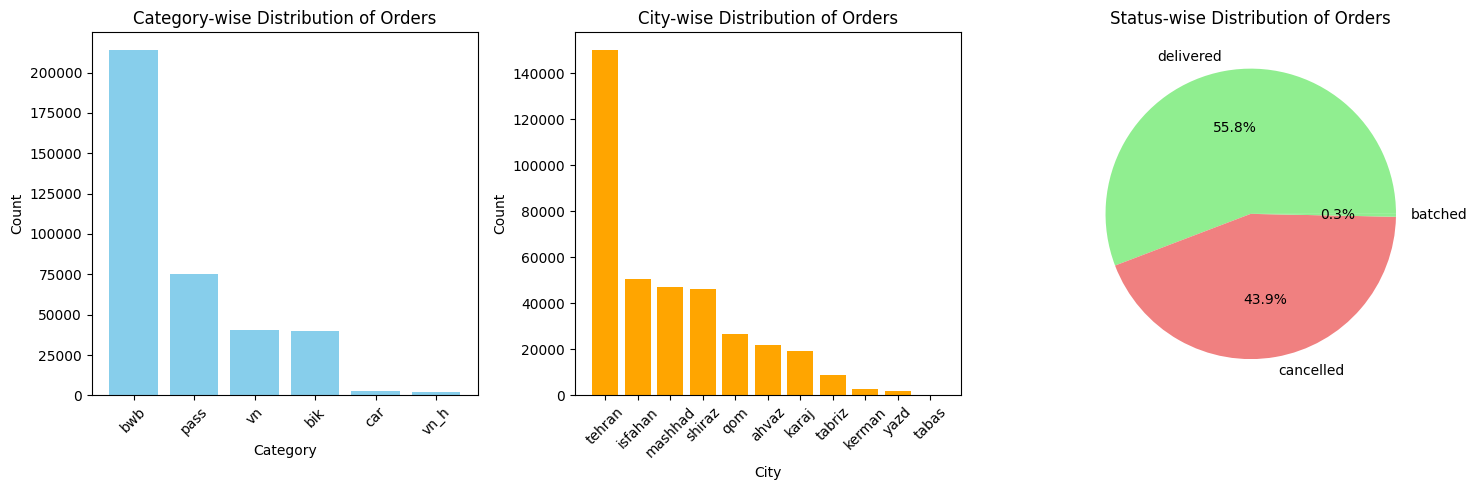

In [58]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Category-wise Bar Plot
axs[0].bar(category_counts.index, category_counts.values, color='skyblue')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].set_title('Category-wise Distribution of Orders')
axs[0].tick_params(axis='x', rotation=45)

# City-wise Bar Plot
axs[1].bar(city_counts.index, city_counts.values, color='orange')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Count')
axs[1].set_title('City-wise Distribution of Orders')
axs[1].tick_params(axis='x', rotation=45)

# Status Pie Chart
axs[2].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axs[2].set_title('Status-wise Distribution of Orders')

# Adjust layout and display the combined chart
plt.tight_layout()
plt.show()

<ipython-input-59-5a99fc297238>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


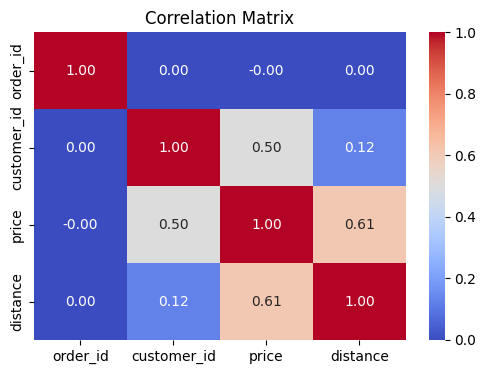

In [59]:
# Correlation Matrix and Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Step 6: Data validation

Data validation is a critical step to ensure that the data cleaning and preprocessing have been performed correctly and that the data meets quality standards. In this process, we will cross-check the preprocessed data against the original data or known data to verify its correctness. Let's perform data validation for your preprocessed data:

In [60]:
# Step 0: Load the original data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/dataset_orders.csv', chunksize=chunk_size)
original_data = pd.concat(data_chunks)

# Save the preprocessed data to a CSV file
data.to_csv('/content/preprocessed_data.csv', index=False)

# Read the preprocessed data from the saved CSV file
preprocessed_data = pd.read_csv('/content/preprocessed_data.csv')

In [61]:
# Step 6.1: Compare the number of rows in original and preprocessed data
original_rows, original_cols = original_data.shape
preprocessed_rows, preprocessed_cols = preprocessed_data.shape

if original_rows == preprocessed_rows:
    print("Step 6.1: Number of rows in original and preprocessed data match.")
else:
    print("Step 6.1: Number of rows in original and preprocessed data do not match. Check for potential issues.")

# Step 6.2: Compare the columns in original and preprocessed data
original_columns = set(original_data.columns)
preprocessed_columns = set(preprocessed_data.columns)

if original_columns == preprocessed_columns:
    print("Step 6.2: Columns in original and preprocessed data match.")
else:
    print("Step 6.2: Columns in original and preprocessed data do not match. Check for potential issues.")

# Step 6.3: Check for any missing values in preprocessed data
missing_values_preprocessed = preprocessed_data.isnull().sum().sum()

if missing_values_preprocessed == 0:
    print("Step 6.3: No missing values in the preprocessed data.")
else:
    print(f"Step 6.3: Preprocessed data contains {missing_values_preprocessed} missing values.")

# Step 6.4: Verify data transformation and cleaning results for specific columns
# (You can cross-check specific columns if needed)

# Example: Verify the uniqueness of 'order_id' in the preprocessed data
if preprocessed_data['order_id'].nunique() == preprocessed_rows:
    print("Step 6.4: 'order_id' is unique in the preprocessed data.")
else:
    print("Step 6.4: 'order_id' is not unique in the preprocessed data. Check for potential issues.")


Step 6.1: Number of rows in original and preprocessed data match.
Step 6.2: Columns in original and preprocessed data match.
Step 6.3: No missing values in the preprocessed data.
Step 6.4: 'order_id' is unique in the preprocessed data.


# Data Analysis Plan
*   Define our objectve and questions
*   Plan the analysis process and the techniques




**Our first objective is that find "Average order Time for Each Category"**  :

In [81]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Calculate the average time for each category

# Convert 'create_time' and 'accept_time' to datetime objects
data['create_time'] = pd.to_datetime(data['create_time'])
data['accept_time'] = pd.to_datetime(data['accept_time'])

# Filter out rows where 'accept_time' is before 'create_time'
valid_data = data[data['accept_time'] >= data['create_time']].copy()

# Calculate the time difference between 'create_time' and 'accept_time' in minutes for valid data
valid_data['time_difference'] = (valid_data['accept_time'] - valid_data['create_time']).dt.total_seconds() / 60

# Group the valid data by 'category' and calculate the average time difference for each category
average_time_per_category = valid_data.groupby('category')['time_difference'].mean()

# Convert the average time in minutes to minutes and seconds format
average_time_per_category = pd.to_datetime(average_time_per_category, unit='m').dt.strftime('%M:%S')

print("Average order Time for Each Category (minutes:seconds):")
print(average_time_per_category)

Average order Time for Each Category (minutes:seconds):
category
bik     03:11
bwb     00:56
car     04:45
pass    00:40
vn      01:11
vn_h    01:59
Name: time_difference, dtype: object


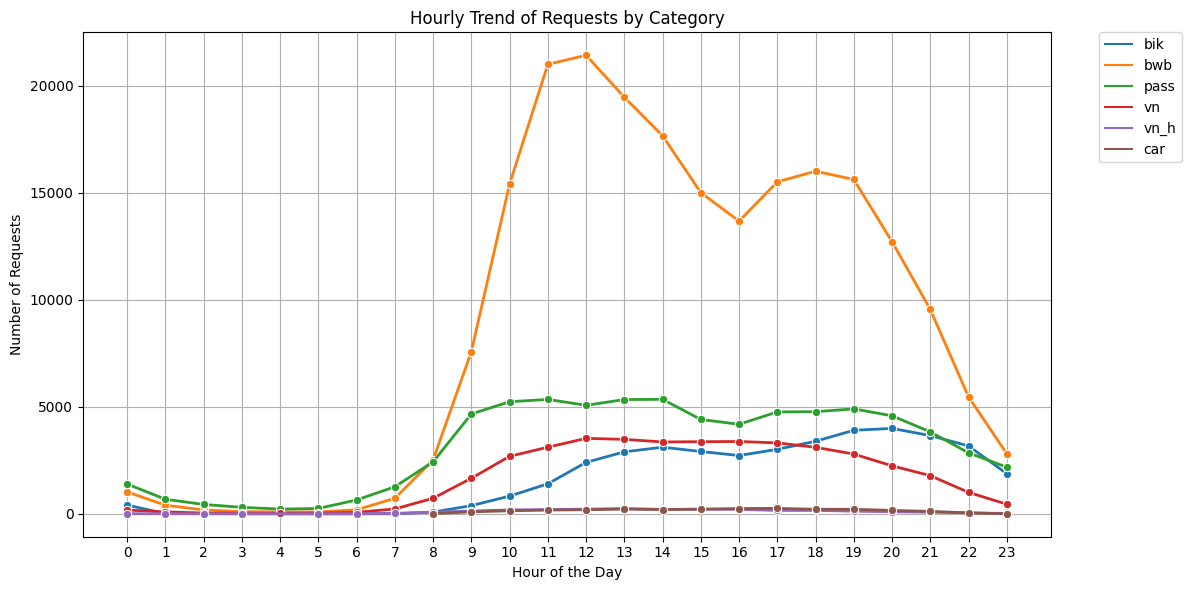

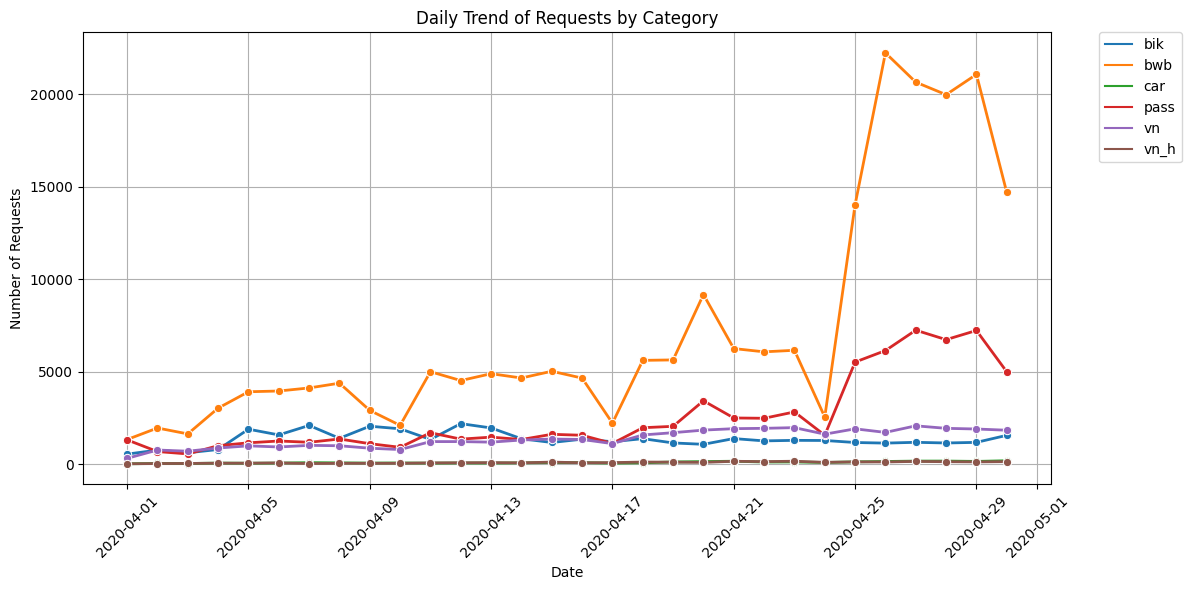

In [82]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Plot

# Group the data by 'hour' and 'category' to get the count of requests for each hour in each category
hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Plot the hourly trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_count_per_category, x='hour', y='count', hue='category', marker='o', linewidth=2)
plt.title('Hourly Trend of Requests by Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Step 5: Daily Trend Plot

# Group the data by 'date' and 'category' to get the count of requests for each day in each category
daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Plot the daily trend for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_count_per_category, x='date', y='count', hue='category', marker='o', linewidth=2)
plt.title('Daily Trend of Requests by Category')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [83]:
# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Cleaning (already performed in the previous steps)

# Step 2: Data Preparation for Hourly Trend Plot

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Extract hour from 'create_time' to create a new 'hour' column
data['hour'] = data['create_time'].dt.hour

# Step 3: Data Preparation for Daily Trend Plot

# Extract date from 'create_time' to create a new 'date' column
data['date'] = data['create_time'].dt.date

# Step 4: Hourly Trend Outlier Detection (Z-score method)

hourly_count_per_category = data.groupby(['hour', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
hourly_count_per_category['z_score'] = (hourly_count_per_category.groupby('category')['count']
                                       .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
hourly_outliers_zscore = hourly_count_per_category[(hourly_count_per_category['z_score'] > 3) |
                                                   (hourly_count_per_category['z_score'] < -3)]

print("Hourly Trend Outliers (Z-score method):")
print(hourly_outliers_zscore)

# Step 5: Daily Trend Outlier Detection (Z-score method)

daily_count_per_category = data.groupby(['date', 'category']).size().reset_index(name='count')

# Calculate Z-score for 'count' column within each category
daily_count_per_category['z_score'] = (daily_count_per_category.groupby('category')['count']
                                      .transform(lambda x: (x - x.mean()) / x.std()))

# Identify potential outliers with Z-score > 3 or Z-score < -3
daily_outliers_zscore = daily_count_per_category[(daily_count_per_category['z_score'] > 3) |
                                                 (daily_count_per_category['z_score'] < -3)]

print("Daily Trend Outliers (Z-score method):")
print(daily_outliers_zscore)

# Step 6: Hourly Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
hourly_summary_iqr = (hourly_count_per_category.groupby('category')['count']
                      .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                      .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
hourly_summary_iqr['lower_bound'] = hourly_summary_iqr['Q1'] - 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])
hourly_summary_iqr['upper_bound'] = hourly_summary_iqr['Q3'] + 1.5 * (hourly_summary_iqr['Q3'] - hourly_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
hourly_outliers_iqr = pd.merge(hourly_count_per_category, hourly_summary_iqr[['lower_bound', 'upper_bound']],
                              on='category', how='left')
hourly_outliers_iqr = hourly_outliers_iqr[
    (hourly_outliers_iqr['count'] < hourly_outliers_iqr['lower_bound']) |
    (hourly_outliers_iqr['count'] > hourly_outliers_iqr['upper_bound'])
]

print("Hourly Trend Outliers (IQR method):")
print(hourly_outliers_iqr)

# Step 7: Daily Trend Outlier Detection (IQR method)

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'count' within each category
daily_summary_iqr = (daily_count_per_category.groupby('category')['count']
                     .agg(['quantile', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
                     .rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', 'quantile': 'median'}))

# Calculate the lower and upper bounds for potential outliers
daily_summary_iqr['lower_bound'] = daily_summary_iqr['Q1'] - 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])
daily_summary_iqr['upper_bound'] = daily_summary_iqr['Q3'] + 1.5 * (daily_summary_iqr['Q3'] - daily_summary_iqr['Q1'])

# Identify potential outliers based on the bounds
daily_outliers_iqr = pd.merge(daily_count_per_category, daily_summary_iqr[['lower_bound', 'upper_bound']],
                             on='category', how='left')
daily_outliers_iqr = daily_outliers_iqr[
    (daily_outliers_iqr['count'] < daily_outliers_iqr['lower_bound']) |
    (daily_outliers_iqr['count'] > daily_outliers_iqr['upper_bound'])
]

print("Daily Trend Outliers (IQR method):")
print(daily_outliers_iqr)


Hourly Trend Outliers (Z-score method):
Empty DataFrame
Columns: [hour, category, count, z_score]
Index: []
Daily Trend Outliers (Z-score method):
Empty DataFrame
Columns: [date, category, count, z_score]
Index: []
Hourly Trend Outliers (IQR method):
Empty DataFrame
Columns: [hour, category, count, z_score, lower_bound, upper_bound]
Index: []
Daily Trend Outliers (IQR method):
           date category  count   z_score  lower_bound  upper_bound
0    2020-04-01      bik    535 -1.927950      596.000     2060.000
36   2020-04-07      bik   2086  1.790496      596.000     2060.000
66   2020-04-12      bik   2183  2.023049      596.000     2060.000
145  2020-04-25      bwb  14029  1.092059    -1222.375    10686.625
147  2020-04-25     pass   5513  1.459249    -1122.250     5049.750
151  2020-04-26      bwb  22238  2.393576    -1222.375    10686.625
153  2020-04-26     pass   6135  1.760818    -1122.250     5049.750
157  2020-04-27      bwb  20654  2.142436    -1222.375    10686.625
159  202

# Next Objective :
we want to predict the number of orders (DELIVERED) in the future.
How many trips will we have on each day of the first week
of May?

# ARIMA

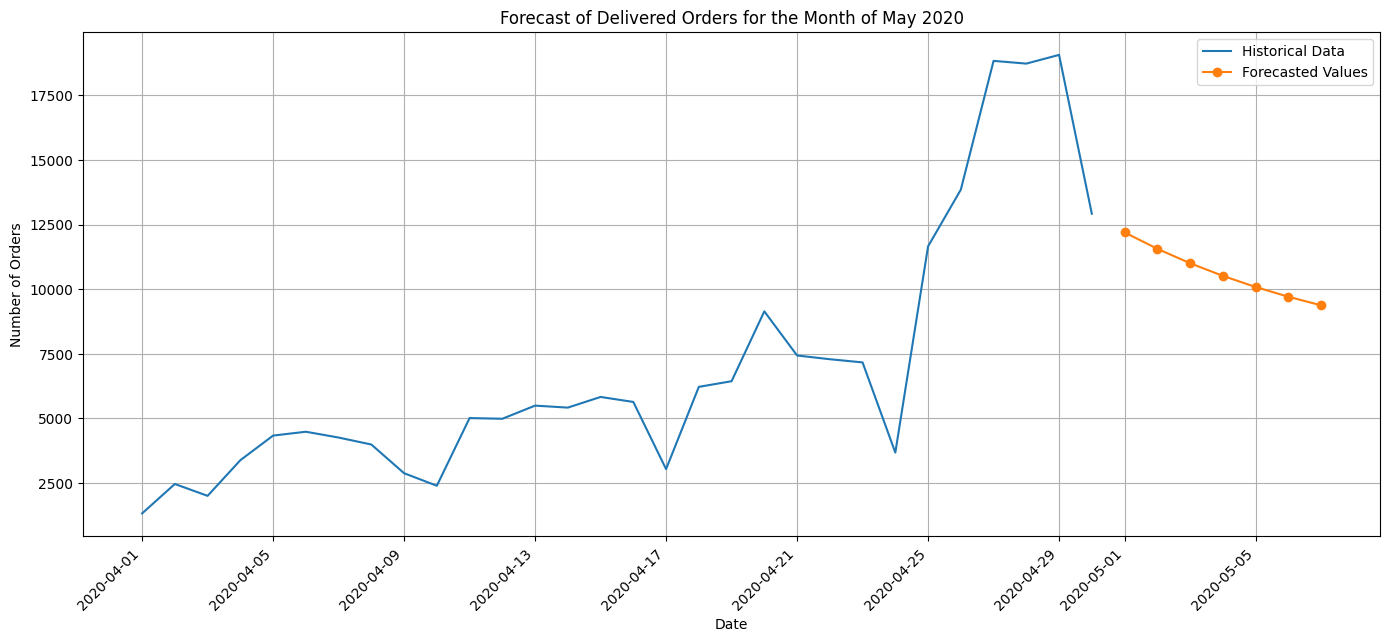

Forecasted Number of Orders for the Month of May 2020:
2020-05-01    12197.212370
2020-05-02    11562.308973
2020-05-03    11004.603905
2020-05-04    10514.710569
2020-05-05    10084.383693
2020-05-06     9706.380549
2020-05-07     9374.339061
Freq: D, Name: predicted_mean, dtype: float64


In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ARIMA model on the historical data
    try:
        arima_model = ARIMA(historical_data, order=(1, 0, 0))  # You can modify the order as needed
        arima_model_fit = arima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-7')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = arima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ARIMA model training:", str(e))

# Additional comments:
# - The code now uses "delivered" instead of "DELIVERED" for consistency.
# - The code includes historical data for April 2020 and uses ARIMA to forecast the number of orders for May 2020.
# - The forecasted values for the month of May 2020 are displayed and plotted in the chart.


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)
SARIMA is an extension of ARIMA that considers seasonal components in addition to autoregressive and moving-average components. It is useful for time series data with seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


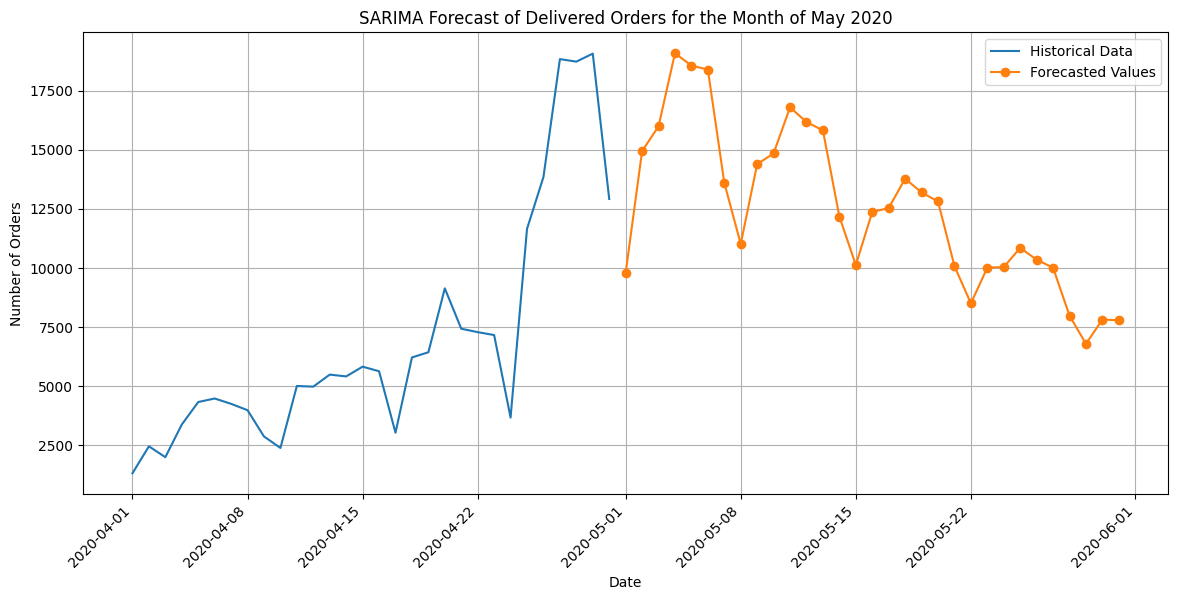

SARIMA Forecasted Number of Orders for the Month of May 2020:
2020-05-01     9792.697543
2020-05-02    14946.004026
2020-05-03    15993.268616
2020-05-04    19084.842035
2020-05-05    18562.582802
2020-05-06    18394.553032
2020-05-07    13606.035020
2020-05-08    11015.328360
2020-05-09    14392.418499
2020-05-10    14849.686367
2020-05-11    16796.951279
2020-05-12    16173.539143
2020-05-13    15824.149964
2020-05-14    12178.643998
2020-05-15    10126.566032
2020-05-16    12370.912650
2020-05-17    12535.032149
2020-05-18    13781.104580
2020-05-19    13195.210957
2020-05-20    12816.990424
2020-05-21    10084.563553
2020-05-22     8504.559069
2020-05-23    10015.181294
2020-05-24    10041.535524
2020-05-25    10851.330664
2020-05-26    10353.721566
2020-05-27    10011.275966
2020-05-28     7985.769475
2020-05-29     6792.177250
2020-05-30     7820.423566
2020-05-31     7788.385383
Freq: D, Name: predicted_mean, dtype: float64


In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the SARIMA Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the SARIMA model on the historical data
    try:
        sarima_model = SARIMAX(historical_data, order=(1, 0, 0), seasonal_order=(1, 0, 0, 7))  # You can modify the order as needed
        sarima_model_fit = sarima_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained SARIMA model to forecast the number of orders for the month of May 2020
        forecast_values = sarima_model_fit.forecast(steps=len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('SARIMA Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("SARIMA Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during SARIMA model training:", str(e))


# Exponential Smoothing (ETS):
ETS methods are based on weighted averages of past observations to make predictions. They can handle data with or without seasonality and trend.

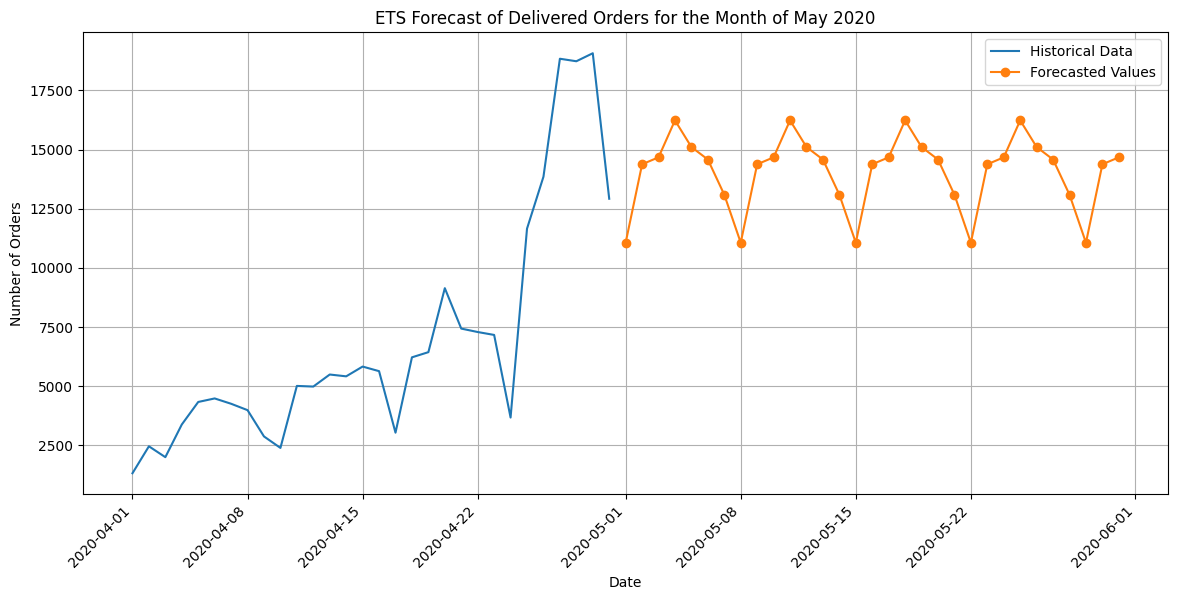

ETS Forecasted Number of Orders for the Month of May 2020:
2020-05-01    11062.372065
2020-05-02    14376.900522
2020-05-03    14670.040792
2020-05-04    16232.011016
2020-05-05    15105.282815
2020-05-06    14577.666625
2020-05-07    13090.607077
2020-05-08    11062.372065
2020-05-09    14376.900522
2020-05-10    14670.040792
2020-05-11    16232.011016
2020-05-12    15105.282815
2020-05-13    14577.666625
2020-05-14    13090.607077
2020-05-15    11062.372065
2020-05-16    14376.900522
2020-05-17    14670.040792
2020-05-18    16232.011016
2020-05-19    15105.282815
2020-05-20    14577.666625
2020-05-21    13090.607077
2020-05-22    11062.372065
2020-05-23    14376.900522
2020-05-24    14670.040792
2020-05-25    16232.011016
2020-05-26    15105.282815
2020-05-27    14577.666625
2020-05-28    13090.607077
2020-05-29    11062.372065
2020-05-30    14376.900522
2020-05-31    14670.040792
Freq: D, dtype: float64


In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Convert 'create_time' to datetime object
data['create_time'] = pd.to_datetime(data['create_time'])

# Filter only the delivered orders
delivered_data = data[data['status'] == 'delivered']

# Set 'create_time' as the index to convert the DataFrame into a time series
delivered_data.set_index('create_time', inplace=True)

# Step 2: Resample the Data on a Daily Basis

# Resample the data on a daily basis and get the count of delivered orders for each day
daily_orders = delivered_data.resample('D').size()

# Step 3: Train the ETS Model for Historical Data

# Select the historical data for April 2020
historical_data = daily_orders['2020-04-01':'2020-04-30']

# Check if the historical data is sufficient for model training
if len(historical_data) < 2:
    print("Insufficient data for model training. Please ensure data includes at least two days of historical data.")
else:
    # Train the ETS model on the historical data
    try:
        ets_model = ExponentialSmoothing(historical_data, seasonal='add', seasonal_periods=7)
        ets_model_fit = ets_model.fit()

        # Step 4: Forecasting for the Month of May 2020

        # Generate the dates for the month of May 2020
        forecast_start_date = pd.to_datetime('2020-05-01')
        forecast_end_date = pd.to_datetime('2020-05-31')
        forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

        # Use the trained ETS model to forecast the number of orders for the month of May 2020
        forecast_values = ets_model_fit.forecast(len(forecast_dates))

        # Plot the forecasted values
        plt.figure(figsize=(14, 6))
        plt.plot(historical_data.index, historical_data.values, label='Historical Data')
        plt.plot(forecast_dates, forecast_values, label='Forecasted Values', marker='o')
        plt.title('ETS Forecast of Delivered Orders for the Month of May 2020')
        plt.xlabel('Date')
        plt.ylabel('Number of Orders')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45, ha='right')  # Rotate date labels for readability
        plt.show()

        print("ETS Forecasted Number of Orders for the Month of May 2020:")
        print(forecast_values)

    except Exception as e:
        print("Error occurred during ETS model training:", str(e))


Prophet: Prophet is a forecasting library developed by Facebook that is designed to handle time series data with strong seasonality and multiple seasonal components.

Machine Learning Algorithms: You can also explore machine learning algorithms like Random Forests, Gradient Boosting, or LSTM (Long Short-Term Memory) networks, which are capable of learning complex patterns in time series data.

State Space Models: State space models can be used to capture both observed and unobserved components of time series data. Kalman filter-based methods are commonly used in state space models.

Gaussian Processes: Gaussian Processes are a powerful non-parametric approach for time series forecasting that can model uncertainty and handle irregularly spaced data.

# Find the cancellation rate

In [94]:
# Import necessary libraries
import pandas as pd

# Step 0: Load the preprocessed data into a DataFrame
chunk_size = 10000
data_chunks = pd.read_csv('/content/preprocessed_data.csv', chunksize=chunk_size)
data = pd.concat(data_chunks)

# Step 1: Data Preparation

# Filter only the delivered and canceled orders
filtered_data = data[(data['status'] == 'delivered') | (data['status'] == 'cancelled')]

# Calculate the total number of canceled orders
total_canceled_orders = filtered_data['status'].value_counts()['cancelled']

# Step 2: Calculate Cancellation Rate

# Calculate the total number of orders (both delivered and canceled)
total_orders = len(filtered_data)

# Calculate the cancellation rate
cancellation_rate = (total_canceled_orders / total_orders) * 100

# Step 3: Analyze Reasons for Cancellation

# Find the reasons for cancellation and their frequencies
cancellation_reasons = filtered_data['cancelled_by'].value_counts()

# Print the results
print("Cancellation Rate: {:.2f}%".format(cancellation_rate))
print("\nCancellation Reasons:")
print(cancellation_reasons)


Cancellation Rate: 44.03%

Cancellation Reasons:
unknown     209205
customer    115090
system       32483
biker        17084
Name: cancelled_by, dtype: int64
